# Práctica 1

## Kevin Rosario
## Amaury Angeles

### Importamos la base de datos.

In [180]:
import pandas as pd
import numpy as np
import os

df = pd.DataFrame(pd.read_csv("Carprice_Assignment.csv"))

### Se seleccionan las variables de interes.

In [181]:
df=df[["price","fueltype","wheelbase","enginetype","horsepower","citympg","highwaympg","peakrpm","cylindernumber"]]

### Se visualizan los campos.

In [182]:
df.head()

,price,fueltype,wheelbase,enginetype,horsepower,citympg,highwaympg,peakrpm,cylindernumber
0,13495.0,gas,88.6,dohc,111,21,27,5000,four
1,16500.0,gas,88.6,dohc,111,21,27,5000,four
2,16500.0,gas,94.5,ohcv,154,19,26,5000,six
3,13950.0,gas,99.8,ohc,102,24,30,5500,four
4,17450.0,gas,99.4,ohc,115,18,22,5500,five


### Se verifican los tipos de datos de los campos.

In [183]:
df.dtypes

price             float64
fueltype           object
wheelbase         float64
enginetype         object
horsepower          int64
citympg             int64
highwaympg          int64
peakrpm             int64
cylindernumber     object
dtype: object

### Se convierten las columnas categoricas en campos binarios de 1 y 0.

In [184]:
df = pd.get_dummies(df, columns=['fueltype','cylindernumber','enginetype'], prefix_sep='__')
df.head()

,price,wheelbase,horsepower,citympg,highwaympg,peakrpm,fueltype__diesel,fueltype__gas,cylindernumber__eight,cylindernumber__five,...,cylindernumber__three,cylindernumber__twelve,cylindernumber__two,enginetype__dohc,enginetype__dohcv,enginetype__l,enginetype__ohc,enginetype__ohcf,enginetype__ohcv,enginetype__rotor
0,13495.0,88.6,111,21,27,5000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,16500.0,88.6,111,21,27,5000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,16500.0,94.5,154,19,26,5000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13950.0,99.8,102,24,30,5500,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,17450.0,99.4,115,18,22,5500,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [185]:
df.dtypes

price                     float64
wheelbase                 float64
horsepower                  int64
citympg                     int64
highwaympg                  int64
peakrpm                     int64
fueltype__diesel            uint8
fueltype__gas               uint8
cylindernumber__eight       uint8
cylindernumber__five        uint8
cylindernumber__four        uint8
cylindernumber__six         uint8
cylindernumber__three       uint8
cylindernumber__twelve      uint8
cylindernumber__two         uint8
enginetype__dohc            uint8
enginetype__dohcv           uint8
enginetype__l               uint8
enginetype__ohc             uint8
enginetype__ohcf            uint8
enginetype__ohcv            uint8
enginetype__rotor           uint8
dtype: object

### Se eliminan variables dicótomicas para permitir la comparación entre ellas.

In [186]:
df = df.drop(['cylindernumber__two','cylindernumber__three','cylindernumber__four','fueltype__diesel',
              'enginetype__dohc','enginetype__dohcv'], axis='columns')

### Se eliminan variables con alta correlación y variables sin correlación con el precio.

In [187]:
df = df.drop(['highwaympg','peakrpm'], axis='columns')

### Se ve gráficamente la distribución de la variable dependiente (precio de los vehículos).

<AxesSubplot:>

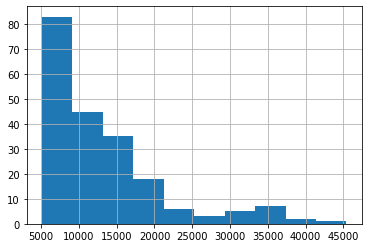

In [188]:
df.price.hist()

### Se separa la base de datos en variables independientes y variable dependiente y se le saca el logaritmo al precio para cambiar la distribución.

In [189]:
X = df.drop('price', axis=1)
y = np.log(df.price)

### Se gráfica la nueva distribución del precio de los vehículos. Donde se obtiene una distribución aproximadamente normal.

<AxesSubplot:>

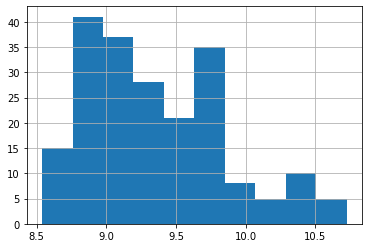

In [190]:
y.hist()

### Se separan los datos en entrenamiento y prueba. Se realiza con un 70 % para entrenamiento y el resto para prueba.

In [191]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     train_size=0.7, 
                                                     random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((143, 13), (143,), (62, 13), (62,))

### Se realiza el modelo de regresión lineal sin regularización y se calculan los errores para entrenamiento y prueba.

In [192]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
print(mse(y_test, lin_mod.predict(X_test)))
print(mse(y_train, lin_mod.predict(X_train)))

0.05680934728744509
0.026700264831196217


### Se aplica gridsearch para encontrar los mejores parametros de la regresión Ridge y se calculan los errores para entrenamiento y prueba y el mejor parametro para Ridge.

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, cv=4, n_jobs=1,refit = True, param_grid=parameters,scoring="neg_mean_squared_error")


ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(mse(y_test, ridge_regressor.predict(X_test)))
print(mse(y_train, ridge_regressor.predict(X_train)))

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.24099e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


{'alpha': 0.01}
0.05656646746904557
0.026701332388268578


### Se aplica gridsearch para encontrar los mejores parametros de la regresión Lasso y se calculan los errores para entrenamiento y prueba y el mejor parametro de Lasso.

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
lasso=Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, cv=4, n_jobs=1,refit = True, param_grid=parameters,scoring="neg_mean_squared_error")

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(mse(y_test, lasso_regressor.predict(X_test)))
print(mse(y_train, lasso_regressor.predict(X_train)))

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04279768080904223, tolerance: 0.002673058579970186
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.001}
0.05351523352448164
0.02740965445438663


### Se aplica gridsearch para encontrar los mejores parametros de la regresión Elasticnet y se calculan los errores para entrenamiento y prueba y el mejor parametro para ElasticNet.

In [195]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

Elastic=ElasticNet()
param_grid = {"alpha":[0.01,0.02,0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.65,0.7,0.75,0.8],"l1_ratio":[0.1,0.3,0.6,0.7,0.9]}

ElasticNet= GridSearchCV(Elastic, cv=5, n_jobs=1,refit = True, param_grid=param_grid,scoring="neg_mean_squared_error")

ElasticNet.fit(X_train, y_train)

print(ElasticNet.best_params_)
print(mse(y_test, ElasticNet.predict(X_test)))
print(mse(y_train, ElasticNet.predict(X_train)))

{'alpha': 0.01, 'l1_ratio': 0.1}
0.04666375197204283
0.02978150848187036


### Se calculan los R cuadrado de los 4 modelos para comparar.

In [196]:
from sklearn.metrics import mean_squared_error, r2_score
predicted_N=lin_mod.predict(X_test)
predicted_R=ridge_regressor.predict(X_test)
predicted_L=lasso_regressor.predict(X_test)
predicted_E = ElasticNet.predict(X_test)

print(r2_score(y_test, predicted_R))
print(r2_score(y_test, predicted_L))
print(r2_score(y_test, predicted_E))
print(r2_score(y_test, predicted_N))

0.7801800595175792
0.7920372974555681
0.8186624754887849
0.7792362171739826


### Se calculan los errores de los 4 modelos para comparar.

In [197]:
print(mse(y_test, lin_mod.predict(X_test)))
print(mse(y_test, ridge_regressor.predict(X_test)))
print(mse(y_test, lasso_regressor.predict(X_test)))
print(mse(y_test, ElasticNet.predict(X_test)))

0.05680934728744509
0.05656646746904557
0.05351523352448164
0.04666375197204283


### El mejor modelo es el de regresión lineal simple con regularización ElasticNet, pasamos a graficar los coeficientes del modelo seleccionado.

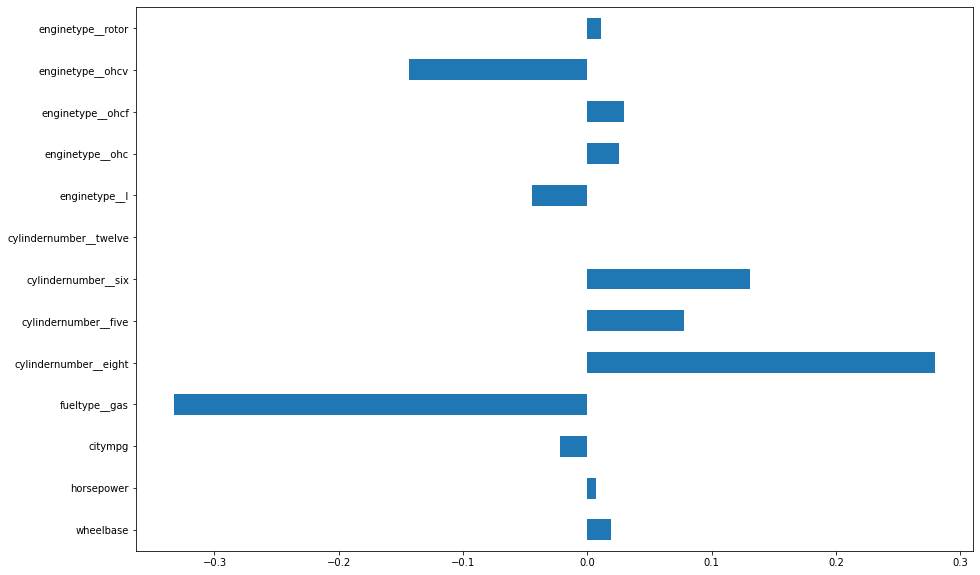

In [198]:
plt.figure(figsize=(15,10))
ft_importances_lm_elasticcv=pd.Series(ElasticNet.best_estimator_.coef_, index=X_train.columns)
ft_importances_lm_elasticcv.plot(kind='barh')
plt.show()